In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
train = pd.read_csv('train.csv')
structures = pd.read_csv('structures.csv')

In [3]:
train.describe()

,id,atom_index_0,atom_index_1,scalar_coupling_constant
count,4.659076e+06,4.659076e+06,4.659076e+06,4.659076e+06
mean,2.329538e+06,1.335677e+01,5.881245e+00,1.591591e+01
std,1.344960e+06,3.269432e+00,4.993794e+00,3.493466e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,-4.476050e+01
25%,1.164769e+06,1.100000e+01,2.000000e+00,-2.551463e-01
50%,2.329538e+06,1.300000e+01,5.000000e+00,2.280350e+00
75%,3.494306e+06,1.600000e+01,8.000000e+00,7.389100e+00
max,4.659075e+06,2.800000e+01,2.800000e+01,2.077090e+02


































As expected, scalar coupling constant could be negative and positive. Another piece of information that might be useful is that scalar coupling constant is mutual, namely JAX= JXA (A and X are two different atoms).


In [4]:
structures.describe()

,atom_index,x,y,z
count,2.358875e+06,2.358875e+06,2.358875e+06,2.358875e+06
mean,8.757255e+00,9.495981e-02,-3.335625e-01,6.239050e-02
std,5.592444e+00,1.655403e+00,1.989328e+00,1.445876e+00
min,0.000000e+00,-9.234889e+00,-9.933938e+00,-9.134765e+00
25%,4.000000e+00,-8.746228e-01,-1.826097e+00,-8.424758e-01
50%,9.000000e+00,5.183962e-02,-4.034906e-01,1.092888e-02
75%,1.300000e+01,1.116163e+00,1.373848e+00,9.393901e-01
max,2.800000e+01,9.382240e+00,1.018196e+01,7.894733e+00


In [5]:
structures.atom.value_counts()

H    1208486
C     831809
O     183202
N     132382
F       2996
Name: atom, dtype: int64

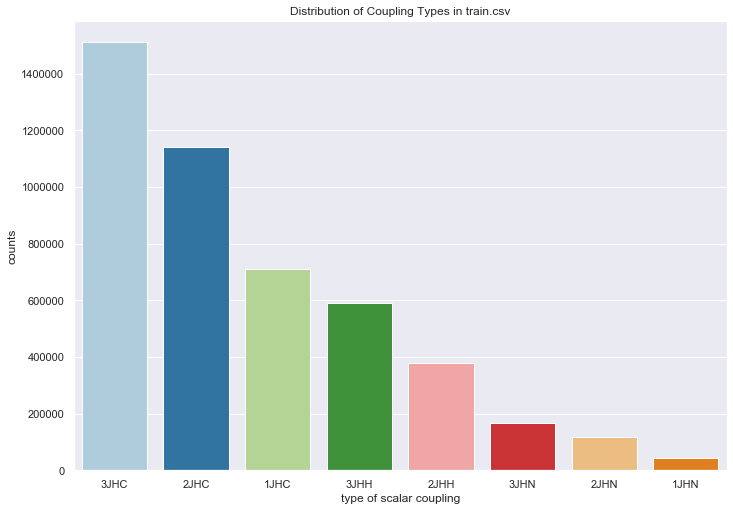

In [6]:
s1 = train.type.value_counts()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=s1.index, y=s1, palette='Paired')
plt.xlabel('type of scalar coupling')
plt.ylabel('counts')
plt.title('Distribution of Coupling Types in train.csv')

plt.show()
































From the barplot above, we can see that three-bond coupling (3J) between carbon (C) and hydrogen(H) is the most common coupling type, and one-bond coupling (1J) between hydrogen(H) and nitrogen(N) is the most rare in train.csv.


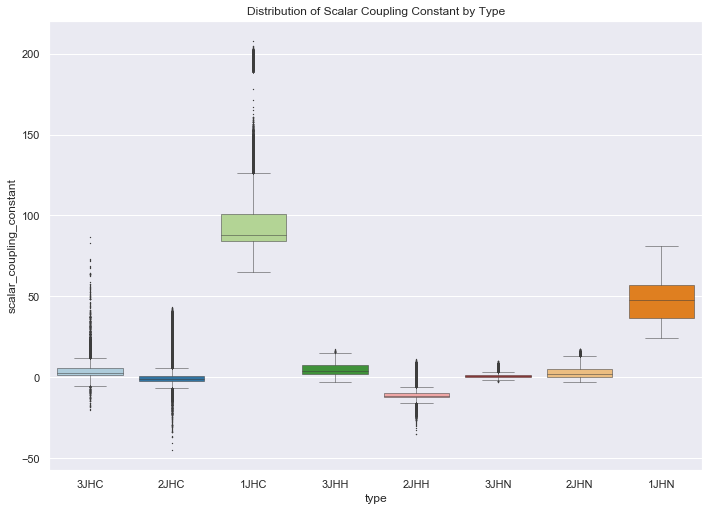

In [7]:
sns.boxplot(x='type',
            y='scalar_coupling_constant', 
            data=train,
            linewidth=0.5,
            fliersize=0.5,
            order=s1.index,
            palette='Paired')
plt.title('Distribution of Scalar Coupling Constant by Type')
plt.show()
































The boxplot above shows the dirtsibution of scalar coupling constant by type. All one-bond couplings including 1JHC and 1JHN has positive scalar coupling constant as expected, and for most of 3JHCC, scalar coupling constants are positive or very close to 0. It appears that one-bond coupling (1J) between H and C has the hightest overall magnitude.


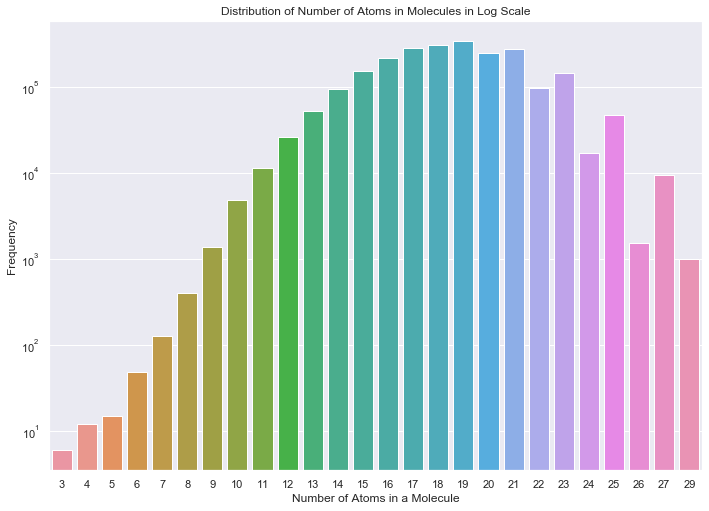

In [8]:
structures['count_of_atoms'] = structures.groupby('molecule_name')['atom_index'].transform('count')
s = structures['count_of_atoms'].value_counts().sort_index()
sns.barplot(s.index, s.values)
plt.xlabel('Number of Atoms in a Molecule')
plt.yscale('log')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Atoms in Molecules in Log Scale')
plt.show()
































From the barplot above we can see that most of molecules consist of 15-21 atoms, small molecules containing less than 10 atoms are not common in this dataset. 


In [9]:
train['bond_length'] = train['type'].str[0]
train['atom_0'] = train['type'].str[2]
train['atom_1'] = train['type'].str[3]

train.head(10)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,bond_length,atom_0,atom_1
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,1,H,C
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,2,H,H
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,2,H,H
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,2,H,H
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,1,H,C
5,5,dsgdb9nsd_000001,2,3,2JHH,-11.2541,2,H,H
6,6,dsgdb9nsd_000001,2,4,2JHH,-11.2548,2,H,H
7,7,dsgdb9nsd_000001,3,0,1JHC,84.8093,1,H,C
8,8,dsgdb9nsd_000001,3,4,2JHH,-11.2543,2,H,H
9,9,dsgdb9nsd_000001,4,0,1JHC,84.8095,1,H,C


In [10]:
df = train.merge(structures, 
                 how='left', 
                 left_on=['molecule_name', 'atom_index_0', 'atom_0'], 
                 right_on=['molecule_name', 'atom_index', 'atom']).merge(structures, 
                 how='left', 
                 left_on=['molecule_name', 'atom_index_1', 'atom_1', 'count_of_atoms'], 
                 right_on=['molecule_name', 'atom_index', 'atom', 'count_of_atoms'], suffixes=['_0', '_1'])
df.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,bond_length,atom_0,atom_1,atom_index_0,atom_0,x_0,y_0,z_0,count_of_atoms,atom_index_1,atom_1,x_1,y_1,z_1
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,1,H,C,1,H,0.002150,-0.006031,0.001976,5,0,C,-0.012698,1.085804,0.008001
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,2,H,H,1,H,0.002150,-0.006031,0.001976,5,2,H,1.011731,1.463751,0.000277
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,2,H,H,1,H,0.002150,-0.006031,0.001976,5,3,H,-0.540815,1.447527,-0.876644
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,2,H,H,1,H,0.002150,-0.006031,0.001976,5,4,H,-0.523814,1.437933,0.906397
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,1,H,C,2,H,1.011731,1.463751,0.000277,5,0,C,-0.012698,1.085804,0.008001


In [11]:
final = df.loc[:, ~df.columns.duplicated()].set_index('id')
final.head()

,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,bond_length,atom_0,atom_1,x_0,y_0,z_0,count_of_atoms,x_1,y_1,z_1
id,,,,,,,,,,,,,,,
0,dsgdb9nsd_000001,1,0,1JHC,84.8076,1,H,C,0.002150,-0.006031,0.001976,5,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,2,H,H,0.002150,-0.006031,0.001976,5,1.011731,1.463751,0.000277
2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,2,H,H,0.002150,-0.006031,0.001976,5,-0.540815,1.447527,-0.876644
3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,2,H,H,0.002150,-0.006031,0.001976,5,-0.523814,1.437933,0.906397
4,dsgdb9nsd_000001,2,0,1JHC,84.8074,1,H,C,1.011731,1.463751,0.000277,5,-0.012698,1.085804,0.008001


In [12]:
p0 = final[['x_0', 'y_0', 'z_0']].values 
p1 = final[['x_1', 'y_1', 'z_1']].values
final['distance'] = np.linalg.norm(p0 - p1, axis=1)
final.head()

,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,bond_length,atom_0,atom_1,x_0,y_0,z_0,count_of_atoms,x_1,y_1,z_1,distance
id,,,,,,,,,,,,,,,,
0,dsgdb9nsd_000001,1,0,1JHC,84.8076,1,H,C,0.002150,-0.006031,0.001976,5,-0.012698,1.085804,0.008001,1.091953
1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,2,H,H,0.002150,-0.006031,0.001976,5,1.011731,1.463751,0.000277,1.783120
2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,2,H,H,0.002150,-0.006031,0.001976,5,-0.540815,1.447527,-0.876644,1.783147
3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,2,H,H,0.002150,-0.006031,0.001976,5,-0.523814,1.437933,0.906397,1.783157
4,dsgdb9nsd_000001,2,0,1JHC,84.8074,1,H,C,1.011731,1.463751,0.000277,5,-0.012698,1.085804,0.008001,1.091952


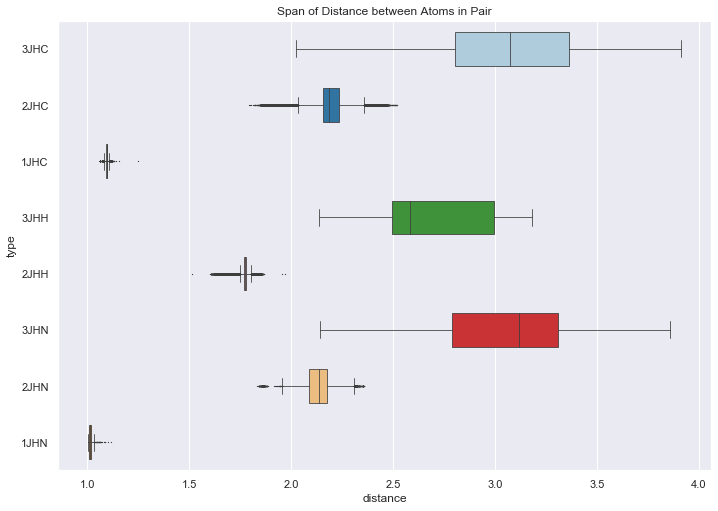

In [13]:
sns.boxplot(x='distance', 
            y='type', 
            data=final, 
            width=0.6, 
            fliersize=0.4,
            linewidth=0.8,
            palette='Paired',
            order=s1.index)
plt.title('Span of Distance between Atoms in Pair')
plt.show()


From the boxplot above, we can see that in general the atom pairs of three-bond coupling are more far apart than those of one-bond coupling.

In [14]:
final['constant_zscore'] = final.groupby('type')['scalar_coupling_constant'].transform(zscore)
final['distance_zscore'] = final.groupby('type')['distance'].transform(zscore)
final['constant_mean_by_type'] = final.groupby('type')['scalar_coupling_constant'].transform('mean')
final['distance_mean_by_type'] = final.groupby('type')['distance'].transform('mean')

final.head()

,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,bond_length,atom_0,atom_1,x_0,y_0,z_0,count_of_atoms,x_1,y_1,z_1,distance,constant_zscore,distance_zscore,constant_mean_by_type,distance_mean_by_type
id,,,,,,,,,,,,,,,,,,,,
0,dsgdb9nsd_000001,1,0,1JHC,84.8076,1,H,C,0.002150,-0.006031,0.001976,5,-0.012698,1.085804,0.008001,1.091953,-0.555806,-0.138877,94.973472,1.092900
1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,2,H,H,0.002150,-0.006031,0.001976,5,1.011731,1.463751,0.000277,1.783120,-0.244498,0.353453,-10.283040,1.774872
2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,2,H,H,0.002150,-0.006031,0.001976,5,-0.540815,1.447527,-0.876644,1.783147,-0.243946,0.354641,-10.283040,1.774872
3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,2,H,H,0.002150,-0.006031,0.001976,5,-0.523814,1.437933,0.906397,1.783157,-0.243821,0.355035,-10.283040,1.774872
4,dsgdb9nsd_000001,2,0,1JHC,84.8074,1,H,C,1.011731,1.463751,0.000277,5,-0.012698,1.085804,0.008001,1.091952,-0.555817,-0.139088,94.973472,1.092900


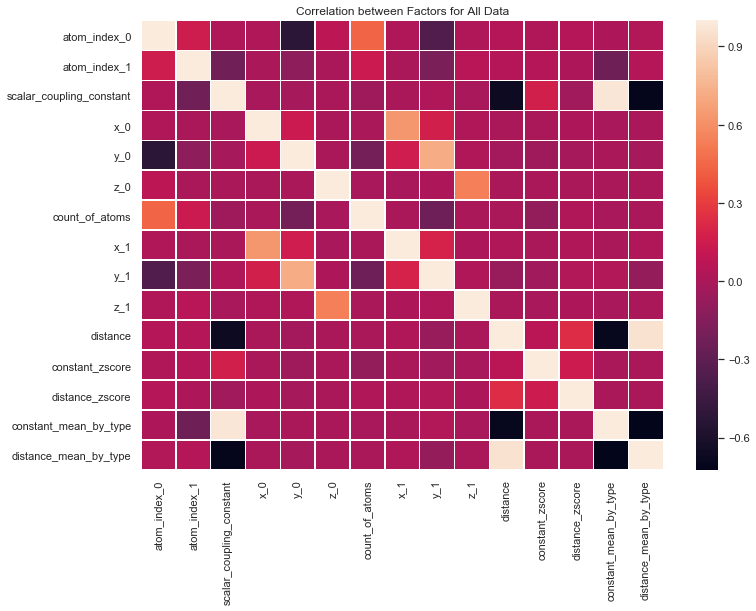

In [15]:
sns.heatmap(final.corr(method='pearson'), linewidths=.5)

plt.title('Correlation between Factors for All Data')
plt.show()

Bond length, distance in between an atom pair and average distance by type are strongly negatively related to scalar coupling constant.

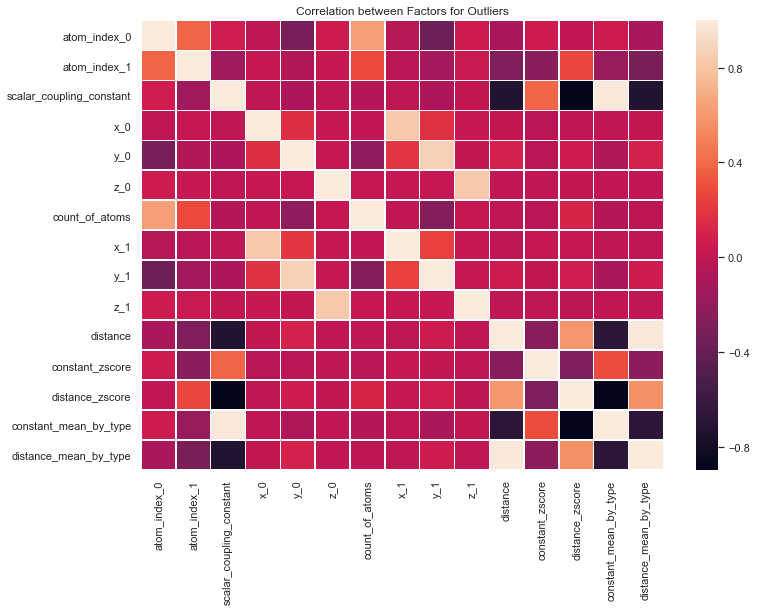

In [16]:
outlier_constant = (final['constant_zscore'] > 3) | (final['constant_zscore'] < -3)
outlier = final.loc[outlier_constant]
sns.heatmap(outlier.corr(method='pearson'), linewidths=.5)
plt.title('Correlation between Factors for Outliers')
plt.show()

For those whose scalar coupling constants are outliers, a heatmap was plotted as above using Pearson's R correlation. It looks like that scalar_coupling_constant is very negatively related to zscore of distance.

In [17]:
df_3JHC = final.loc[final['type'] == '3JHC']
df_3JHH = final.loc[final['type'] == '3JHH']
df_3JHN = final.loc[final['type'] == '3JHN']

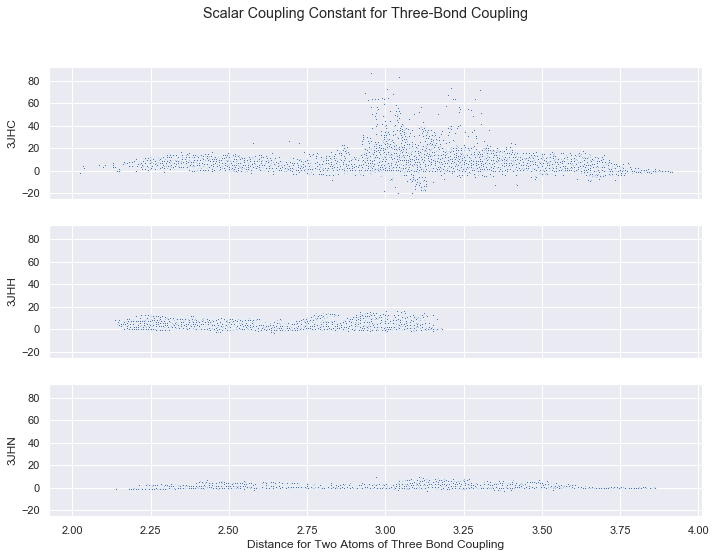

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True)
sns.scatterplot(x='distance', y='scalar_coupling_constant', data=df_3JHC, s=5, ax=axes[0])
sns.scatterplot(x='distance', y='scalar_coupling_constant', data=df_3JHH, s=5, ax=axes[1])
sns.scatterplot(x='distance', y='scalar_coupling_constant', data=df_3JHN, s=5, ax=axes[2])
axes[0].set(ylabel='3JHC')
axes[1].set(ylabel='3JHH')
axes[2].set(ylabel='3JHN')
plt.xlabel('Distance for Two Atoms of Three Bond Coupling')
plt.suptitle('Scalar Coupling Constant for Three-Bond Coupling')
plt.show()

For three-bond coupling, scalar coupling constant does not have strong correlation with distance in between the pair of atoms. It was expected that the distances of N-H and C-H three bond coupling have larger spread than that of H-H, since C-C bond and N-H bond are usually longer than C-H bond.

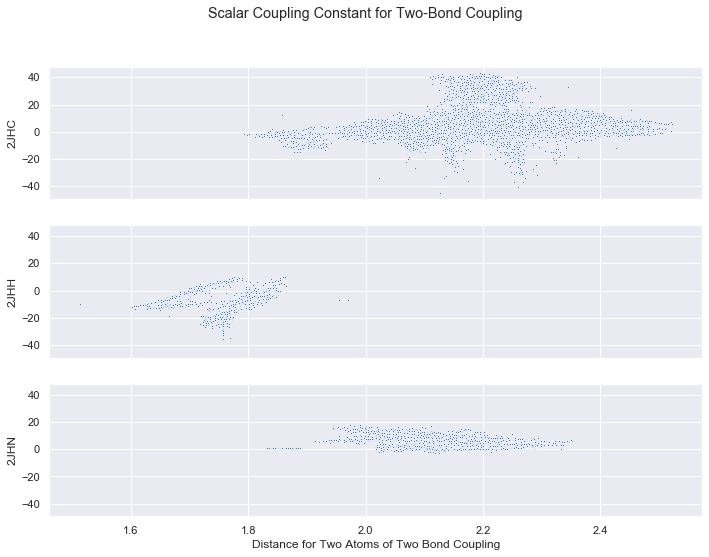

In [19]:
df_2JHC = final.loc[final['type'] == '2JHC']
df_2JHH = final.loc[final['type'] == '2JHH']
df_2JHN = final.loc[final['type'] == '2JHN']
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True)
sns.scatterplot(x='distance', y='scalar_coupling_constant', data=df_2JHC, s=5, ax=axes[0])
sns.scatterplot(x='distance', y='scalar_coupling_constant', data=df_2JHH, s=5, ax=axes[1])
sns.scatterplot(x='distance', y='scalar_coupling_constant', data=df_2JHN, s=5, ax=axes[2])
axes[0].set(ylabel='2JHC')
axes[1].set(ylabel='2JHH')
axes[2].set(ylabel='2JHN')
plt.xlabel('Distance for Two Atoms of Two Bond Coupling')
plt.suptitle('Scalar Coupling Constant for Two-Bond Coupling')

plt.show()

For two-bond coupling, scalar coupling constant does not have strong correlation with distance in between the pair of atoms, except for 2JHH it seems that there was a positive correlation between distance and scalar coupling constant. Again, the distances of 2JHN and 2JHC were longer than 2JHH. 

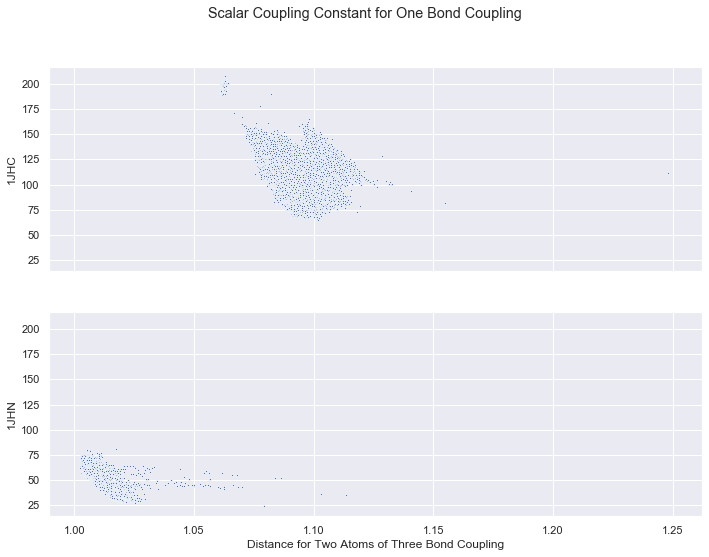

In [20]:
df_1JHC = final.loc[final['type'] == '1JHC']
df_1JHN = final.loc[final['type'] == '1JHN']
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True)
sns.scatterplot(x='distance', y='scalar_coupling_constant', data=df_1JHC, s=5, ax=axes[0])
sns.scatterplot(x='distance', y='scalar_coupling_constant', data=df_1JHN, s=5, ax=axes[1])

axes[0].set(ylabel='1JHC')
axes[1].set(ylabel='1JHN')
plt.xlabel('Distance for Two Atoms of Three Bond Coupling')
plt.suptitle('Scalar Coupling Constant for One Bond Coupling')

plt.show()

For one-bond coupling, scalar coupling constants were all positive and were negatively correlated to distance between two atoms. This is probably because for directly related atoms (that is to say these two atoms form one chemical bond), the more far apart the two atoms, the less impact they have on each other, and therefore the scalar coupling is less significant.